In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('rule_based_eval.csv')
df.rename(columns = {'Unnamed: 0': "metrics"}, inplace=True)
df

,metrics,celltypes,currents,simenvironments,modelconcepts,modeltypes,receptors,regions
0,precision_micro,0.031630,0.162939,0.177062,0.091300,0.261364,0.148649,0.149837
1,recall_micro,0.099237,0.775665,0.651852,0.393519,0.389831,0.868421,0.560976
2,f1_micro,0.047970,0.269307,0.278481,0.148213,0.312925,0.253846,0.236504
3,jaccard,0.031751,0.155924,0.197082,0.084402,0.209387,0.133872,0.150650
4,hamming,0.022636,0.254366,0.026472,0.052476,0.110564,0.126797,0.084255


In [3]:
# remove hamming distance
df = df.iloc[:-1, :]

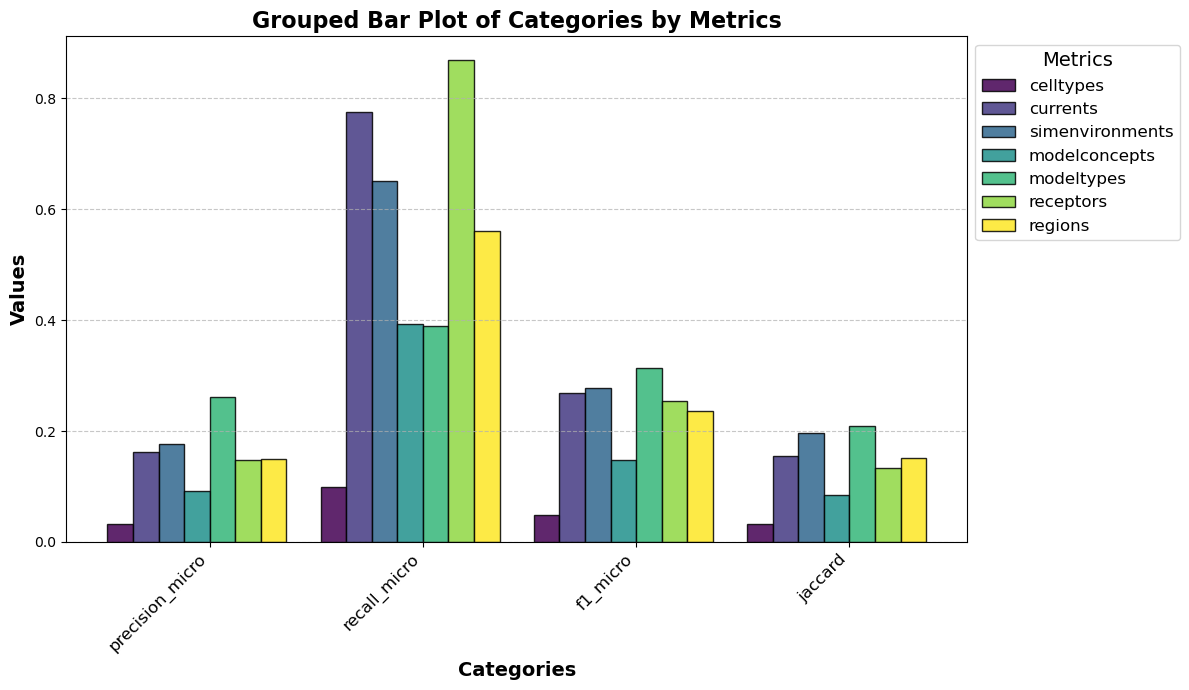

In [4]:
fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(df.index))  # Label locations
width = 0.12  # Width of the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(df.columns)-1))  # Generate colors

# Plot each metric with distinct colors
for i, (col, color) in enumerate(zip(df.columns[1:], colors)):
    ax.bar(x + i * width, df[col], width, label=col, color=color, edgecolor='black', alpha=0.85)

# Formatting the plot
ax.set_xlabel("Categories", fontsize=14, fontweight='bold')
ax.set_ylabel("Values", fontsize=14, fontweight='bold')
ax.set_title("Grouped Bar Plot of Categories by Metrics", fontsize=16, fontweight='bold')
ax.set_xticks(x + width * (len(df.columns) - 1) / 2)
ax.set_xticklabels(df['metrics'], rotation=45, ha='right', fontsize=12)
ax.legend(title="Metrics", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1,1))
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()